In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, time, os, math
import tmdbsimple as tmdb
from tqdm.notebook import tqdm
import scipy.stats as stats
tmdb.API_KEY =  '56a16fe8a7dd1bf1c8e388a0c11ab94f'

In [3]:
FOLDER = "Loading_Cleaning/Data"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'Datafinal_tmdb_data_2000.csv.gz',
 'Datafinal_tmdb_data_2001.csv.gz',
 'Datafinal_tmdb_data_2015.csv.gz',
 'Datafinal_tmdb_data_2016.csv.gz',
 'Datafinal_tmdb_data_2017.csv.gz',
 'Datafinal_tmdb_data_2018.csv.gz',
 'Datafinal_tmdb_data_2019.csv.gz',
 'Datatmdb_api_results_2000.json',
 'Datatmdb_api_results_2001.json',
 'Datatmdb_api_results_2015.json',
 'Datatmdb_api_results_2016.json',
 'Datatmdb_api_results_2017.json',
 'Datatmdb_api_results_2018.json',
 'Datatmdb_api_results_2019.json',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_results_combined.csv.gz']

In [4]:
basics = pd.read_csv(r'Loading_Cleaning/Data/title_basics.csv.gz', low_memory = False)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0094859,movie,Chief Zabu,Chief Zabu,0,2016,NaN,74,Comedy


In [5]:
def movie_with_rating(movie_id):
# Get movie and release dates
    movie = tmdb.Movies(movie_id)
# construct output dict
    info = movie.info()
    releases = movie.releases()
# Loop through countries in releases
    for c in releases['countries']:
    # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
        ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']
    return info

In [6]:
def write_json(new_data, filename): 
        """Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""    
    
        with open(filename,'r+') as file:
            file_data = json.load(file)
            if (type(new_data) == list) & (type(file_data) == list):
                file_data.extend(new_data)
            else:
                 file_data.append(new_data)
        
            file.seek(0)
            json.dump(file_data, file)

In [7]:
YEARS_TO_GET = [2019, 2018, 2017, 2016, 2015]

In [7]:
for YEAR in tqdm(YEARS_TO_GET,desc='YEARS',position=0):
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    file_exists = os.path.isfile(JSON_FILE)
    if file_exists == False:
            with open(JSON_FILE,'w') as f:
                json.dump([{'imdb_id':0}],f)
    df = basics.loc[ basics['startYear']==YEAR].copy()
    movie_ids = df['tconst'].copy()
    previous_df = pd.read_json(JSON_FILE)
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    for movie_id in tqdm(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
            try:
                temp = movie_with_rating(movie_id)  
                write_json(temp,JSON_FILE)
                time.sleep(0.02)
            except Exception as e:
                continue
            
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/5 [00:00<?, ?it/s]

Movies from 2019:   0%|          | 0/5707 [00:00<?, ?it/s]

Movies from 2018:   0%|          | 0/5626 [00:00<?, ?it/s]

Movies from 2017:   0%|          | 0/5512 [00:00<?, ?it/s]

Movies from 2016:   0%|          | 0/5148 [00:00<?, ?it/s]

Movies from 2015:   0%|          | 0/4932 [00:00<?, ?it/s]

In [8]:
y2k15 = pd.read_csv('Loading_Cleaning/Data/Datafinal_tmdb_data_2015.csv.gz', low_memory = False)
y2k15.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0191476,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,365165.0,ro,Această lehamite,...,0.000000e+00,98.0,"[{'english_name': 'Romanian', 'iso_639_1': 'ro...",Released,NaN,Fed Up,0.0,4.400,5.0,NaN
2,tt0369610,0.0,/yOCRqvrRrxbs5FYq2pX1KtLJwmR.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397.0,en,Jurassic World,...,1.671713e+09,124.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,0.0,6.675,18333.0,PG-13
3,tt0420293,0.0,/b0p0OPx1ZDZVc8iDB1kle0Cc2H9.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",http://www.stanfordprisonexperimentfilm.com/,308032.0,en,The Stanford Prison Experiment,...,6.435570e+05,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They were given 2 weeks. It lasted 6 days.,The Stanford Prison Experiment,0.0,6.900,811.0,R
4,tt0462335,0.0,/wESuRMxELPAwo56qFRcoyI4p20F.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",http://www.highrisefilm.com,254302.0,en,High-Rise,...,3.464720e+05,119.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,Leave the real world behind,High-Rise,0.0,5.700,975.0,R


In [9]:
y2k16 = pd.read_csv('Loading_Cleaning/Data/Datafinal_tmdb_data_2016.csv.gz', low_memory = False)
y2k16.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0094859,0.0,NaN,NaN,187.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,431608.0,en,Chief Zabu,...,0.0,74.0,[],Released,An outrageous social comedy about a New York r...,Chief Zabu,0.0,0.0,0.0,NaN
2,tt0315642,0.0,/lD6lYulY6js9EAgUufh2ekNnCR4.jpg,NaN,5200000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,275269.0,hi,वज़ीर,...,9200000.0,103.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,This new year make your best move,Wazir,0.0,6.6,101.0,PG-13
3,tt0376479,0.0,/fDxdfM4Qj2Qhc6EZYPyB3k4xatw.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.americanpastoral.movie/,326285.0,en,American Pastoral,...,0.0,108.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A radically ordinary story.,American Pastoral,0.0,6.1,586.0,R
4,tt0443533,0.0,/iU9ij6jSQOJDPFnqBUPzEY2eOs6.jpg,NaN,20000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,410366.0,en,The History of Love,...,0.0,134.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The History of Love,0.0,6.4,76.0,NaN


In [10]:
y2k17 = pd.read_csv('Loading_Cleaning/Data/Datafinal_tmdb_data_2017.csv.gz', low_memory = False)
y2k17.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0100275,0.0,/2S2XTeS2b0LPnqzXBDD3ZmwPF2X.jpg,NaN,0.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",NaN,467254.0,es,La telenovela errante,...,0.0,80.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,NaN,The Wandering Soap Opera,0.0,6.625,12.0,NaN
2,tt0137204,0.0,/92PDk4xvjTdGXrQYF0QOojK2btM.jpg,NaN,0.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,503326.0,en,Joe Finds Grace,...,0.0,83.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A GLOVE STORY,Joe Finds Grace,0.0,10.000,1.0,NaN
3,tt0331314,0.0,/BiDHVlIs5Pm2uSqd2e2n7yT582.jpg,NaN,0.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,435995.0,en,Bunyan and Babe,...,0.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You don't have to BE BIG to do BIG THINGS,Bunyan and Babe,0.0,6.000,18.0,PG
4,tt0339736,0.0,/lobIr3Fq2buOUxXtursuEJEjfri.jpg,NaN,4000000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,444193.0,en,The Evil Within,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You Can't Run From a Nightmare,The Evil Within,0.0,5.900,74.0,NaN


In [11]:
y2k18 = pd.read_csv('Loading_Cleaning/Data/Datafinal_tmdb_data_2018.csv.gz', low_memory = False)
y2k18.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0069049,0.0,/zjG95oDnBcFKMPgBEmmuNVOMC90.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}]",https://www.netflix.com/title/80085566,299782.0,en,The Other Side of the Wind,...,0.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,40 years in the making,The Other Side of the Wind,0.0,6.700,156.0,R
2,tt0192528,0.0,/gkBxjhtVEqgxOiRwRfWw1j7ez6K.jpg,NaN,5000000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,567662.0,en,Reverse Heaven,...,0.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Heaven's in trouble and there's one man who ca...,Heaven & Hell,0.0,6.300,6.0,NaN
3,tt0360556,0.0,/7oy4miyq4WYYy0xtX6lbNVPrEsr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",https://www.hbo.com/movies/fahrenheit-451,401905.0,en,Fahrenheit 451,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Knowledge is a dangerous thing,Fahrenheit 451,0.0,5.415,703.0,PG-13
4,tt0365545,0.0,/ljTYcQ3pkzYF52Z8ev1Z1UThnPy.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",https://www.netflix.com/title/80189630,519035.0,en,Nappily Ever After,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let yourself grow,Nappily Ever After,0.0,7.207,762.0,NaN


In [12]:
y2k19 = pd.read_csv('Loading_Cleaning/Data/Datafinal_tmdb_data_2019.csv.gz', low_memory = False)
y2k19.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0385887,0.0,/xMHeU84wLQ9uH9acJ0oPgdii9wO.jpg,NaN,26000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",https://www.motherlessbrooklynfilm.com,504562.0,en,Motherless Brooklyn,...,18377736.0,145.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Motherless Brooklyn,0.0,6.721,1175.0,R
2,tt0437086,0.0,/8RKBHHRqOMOLh5qW3sS6TSFTd8h.jpg,NaN,170000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",https://family.20thcenturystudios.com/movies/a...,399579.0,en,Alita: Battle Angel,...,404852543.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,An angel falls. A warrior rises.,Alita: Battle Angel,0.0,7.198,7626.0,PG-13
3,tt0441881,0.0,/7uacpbrJd9g9xSTLgfyg1NwkAiu.jpg,NaN,23934823.0,"[{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...",http://dangerclosemovie.com,508664.0,en,Danger Close: The Battle of Long Tan,...,2078370.0,119.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Outnumbered. Outgunned. Never out of courage,Danger Close: The Battle of Long Tan,0.0,6.917,240.0,R
4,tt0448115,0.0,/qwgGtdlLMKYvT2tV8hLY22syRHN.jpg,"{'id': 724848, 'name': 'Shazam! Collection', '...",80000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.shazammovie.com,287947.0,en,Shazam!,...,366080049.0,132.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Just say the word.,Shazam!,0.0,7.000,7799.0,PG-13


In [13]:
combined_years = pd.concat([y2k15, y2k16, y2k17, y2k18, y2k19])
combined_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21230 entries, 0 to 4720
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                21230 non-null  object 
 1   adult                  21225 non-null  float64
 2   backdrop_path          15272 non-null  object 
 3   belongs_to_collection  1240 non-null   object 
 4   budget                 21225 non-null  float64
 5   genres                 21225 non-null  object 
 6   homepage               5782 non-null   object 
 7   id                     21225 non-null  float64
 8   original_language      21225 non-null  object 
 9   original_title         21225 non-null  object 
 10  overview               20737 non-null  object 
 11  popularity             21225 non-null  float64
 12  poster_path            20350 non-null  object 
 13  production_companies   21225 non-null  object 
 14  production_countries   21225 non-null  object 
 15  rel

In [14]:
combined_years = combined_years.loc[combined_years['imdb_id']!='0']
combined_years = combined_years.reset_index(drop=True)
combined_years.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0191476,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,365165.0,ro,Această lehamite,...,0.000000e+00,98.0,"[{'english_name': 'Romanian', 'iso_639_1': 'ro...",Released,NaN,Fed Up,0.0,4.400,5.0,NaN
1,tt0369610,0.0,/yOCRqvrRrxbs5FYq2pX1KtLJwmR.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397.0,en,Jurassic World,...,1.671713e+09,124.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,0.0,6.675,18333.0,PG-13
2,tt0420293,0.0,/b0p0OPx1ZDZVc8iDB1kle0Cc2H9.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",http://www.stanfordprisonexperimentfilm.com/,308032.0,en,The Stanford Prison Experiment,...,6.435570e+05,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They were given 2 weeks. It lasted 6 days.,The Stanford Prison Experiment,0.0,6.900,811.0,R
3,tt0462335,0.0,/wESuRMxELPAwo56qFRcoyI4p20F.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",http://www.highrisefilm.com,254302.0,en,High-Rise,...,3.464720e+05,119.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,Leave the real world behind,High-Rise,0.0,5.700,975.0,R
4,tt0478970,0.0,/a7sAqMKv5tkAdMzFfIhPqIBmQ9g.jpg,"{'id': 422834, 'name': 'Ant-Man Collection', '...",130000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/movies/movie/180/ant-man,102899.0,en,Ant-Man,...,5.193120e+08,117.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Heroes don't get any bigger.,Ant-Man,0.0,7.087,17359.0,PG-13


In [15]:
combined_years.drop(combined_years.loc[combined_years['revenue'] == 0.0].index, inplace=True)
combined_years.drop(combined_years.loc[combined_years['budget'] == 0.0].index, inplace=True)
combined_years.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0369610,0.0,/yOCRqvrRrxbs5FYq2pX1KtLJwmR.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397.0,en,Jurassic World,...,1.671713e+09,124.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,0.0,6.675,18333.0,PG-13
4,tt0478970,0.0,/a7sAqMKv5tkAdMzFfIhPqIBmQ9g.jpg,"{'id': 422834, 'name': 'Ant-Man Collection', '...",130000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/movies/movie/180/ant-man,102899.0,en,Ant-Man,...,5.193120e+08,117.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Heroes don't get any bigger.,Ant-Man,0.0,7.087,17359.0,PG-13
7,tt0810819,0.0,/reOdKBPXT9TpwyYnGGyKxG3jXe6.jpg,NaN,15000000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,306819.0,en,The Danish Girl,...,6.419152e+07,119.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Find the courage to be yourself.,The Danish Girl,0.0,7.620,5247.0,R
8,tt0884732,0.0,/7oX9Sk51Bd7efCzkQ92INHTLx3r.jpg,NaN,23000000.0,"[{'id': 35, 'name': 'Comedy'}]",https://www.sonypictures.com/movies/thewedding...,252838.0,en,The Wedding Ringer,...,7.979988e+07,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,He's the best man... money can buy.,The Wedding Ringer,0.0,6.466,1390.0,R
10,tt1014763,0.0,/sjsaxwNsgBbrWrJIXtCT5DNo9Mt.jpg,NaN,50000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",NaN,181283.0,en,Child 44,...,3.324330e+06,137.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,How do you find a killer who doesn’t exist?,Child 44,0.0,6.262,1409.0,R


In [17]:
will_drop = ['homepage', 'original_language', 'original_title', 
                'spoken_languages', 'status', 'tagline', 'video', 
               'vote_average', 'vote_count', 'backdrop_path', 'belongs_to_collection','adult', 'overview', 'popularity', 'poster_path', 'production_companies',
             'production_countries']
combined_years = combined_years.drop(columns=will_drop)


In [19]:
combined_years.head()

,imdb_id,budget,genres,id,release_date,revenue,runtime,title,certification
1,tt0369610,150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397.0,2015-06-06,1.671713e+09,124.0,Jurassic World,PG-13
4,tt0478970,130000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",102899.0,2015-07-14,5.193120e+08,117.0,Ant-Man,PG-13
7,tt0810819,15000000.0,"[{'id': 18, 'name': 'Drama'}]",306819.0,2015-01-01,6.419152e+07,119.0,The Danish Girl,R
8,tt0884732,23000000.0,"[{'id': 35, 'name': 'Comedy'}]",252838.0,2015-01-16,7.979988e+07,101.0,The Wedding Ringer,R
10,tt1014763,50000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",181283.0,2015-03-15,3.324330e+06,137.0,Child 44,R


In [29]:
combined_years['certification'].value_counts(dropna = False)


NaN      441
R        377
PG-13    316
PG       124
NR        41
G         13
NC-17      5
Name: certification, dtype: int64

In [36]:
combined_years['certification'] = combined_years['certification'].str.strip()
cert_clean = {'UR': 'NR', 'Not Rated': 'NR', 'Unrated': 'NR', '-': 'NR',
             'ScreamFest Horror Film Festival': 'NR', '10': np.nan}
combined_years['certification'] = combined_years['certification'].replace(cert_clean)
combined_years['certification'].value_counts()

R        377
PG-13    316
PG       124
NR        41
G         13
NC-17      5
Name: certification, dtype: int64

In [40]:
print(combined_years.isna().sum())
combined_years.dropna(inplace = True)
combined_years.isna().sum()

imdb_id          0
budget           0
genres           0
id               0
release_date     0
revenue          0
runtime          0
title            0
certification    0
dtype: int64

## AB Testing

### Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?
- $H_0$: There is no significant difference in  the revenue based on MPAA ratings of films.
- $H_A$:There is a significant difference in revenue generated based on MPAA ratings.
    
 

- **The appropriate test to perform would be:**

    - Measuring a numeric quantity (revenue)
    - Comparing more than 2 groups or samples (G, PG, PG-13, etc)
    - We therefore want to perform an ANOVA/Tukey test 
- **According to the work flow, the ANOVA Test has the following assumptions:** 
   - No significant outliers
   - Normality
   - Equal Variance
   

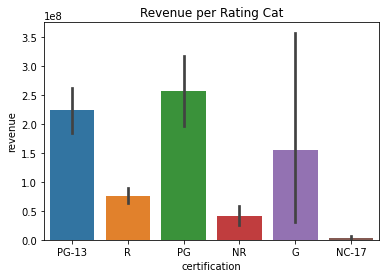

In [23]:
ax = sns.barplot(data=combined_years, x='certification',y='revenue')
ax.set_title('Revenue per Rating Cat');

In [41]:
groups = {}
for n in combined_years['certification'].unique():
    data = combined_years.loc[combined_years['certification'] == n, 'revenue'].copy()
    groups[n] = data
groups.keys()

dict_keys(['PG-13', 'R', 'PG', 'NR', 'G', 'NC-17'])

In [44]:
zscore_results = {}
for k, data in groups.items():
    zscores = stats.zscore(data)
    outliers = abs(zscores) > 3 
    zscore_results[k] = {'outliers': np.sum(outliers)}
Outlier_df = pd.DataFrame(zscore_results).T
Outlier_df

,outliers
PG-13,8
R,10
PG,2
NR,1
G,1
NC-17,0


In [45]:
for i, data in groups.items():
    data = data[(np.abs(stats.zscore(data)) < 3)] 
    groups[i] = data

In [47]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.shapiro(data)
    norm_results[i] = {'n': len(data), 'p':p, 'test stat': stat}
    

norm_results_df = pd.DataFrame(norm_results).T
norm_results_df['sig'] = norm_results_df['p'] < .05
norm_results_df

,n,p,test stat,sig
PG-13,308.0,7.480745e-23,0.706957,True
R,367.0,1.155321e-24,0.711543,True
PG,122.0,3.610103e-13,0.748648,True
NR,40.0,2.069600e-06,0.774428,True
G,12.0,6.198105e-04,0.686000,True
NC-17,5.0,2.343865e-04,0.569275,True


- With regards to a sample size smaller than 15 and all ratings having less than a .05 p-value I will reject my null hypothesis and support the alt hypothesis.
- There is a significant difference between film revenues based on rating.
- p-value was less than .05 given my sample size it's clear  that revenue differs based on film rating 
-Films rated PG and PG-13 generate the most revenue

### Does film runtime impact revenue?
- $H_0$: There is no significant difference in  the revenue based on film runtime.
- $H_A$:There is a significant difference in revenue generated based film runtime.
    


- **The appropriate test to perform would be:**

    - Measuring a numeric quantity (revenue)
    - Our test groups are binomial being either over 120 minutes or not
    - We therefore want to perform an independent t-test
- **According the the work flow, the T-Test has the following assumptions:** 
    - No significant outliers
    - Normality
    - Equal Variance

In [52]:
combined_years['2hr+'] = combined_years['runtime']> 120

In [53]:
over_df = combined_years.loc[combined_years['2hr+']==True, ['revenue', '2hr+']]
under_df = combined_years.loc[combined_years['2hr+']==False, ['revenue', '2hr+']]
plot_df = pd.concat([over_df, under_df], axis=0)
plot_df

,revenue,2hr+
1,1.671713e+09,True
10,3.324330e+06,True
46,4.406035e+08,True
48,9.883787e+07,True
49,9.077700e+06,True
...,...,...
20488,4.440000e+07,False
20624,5.750000e+06,False
20626,6.163178e+07,False
20679,9.341824e+06,False


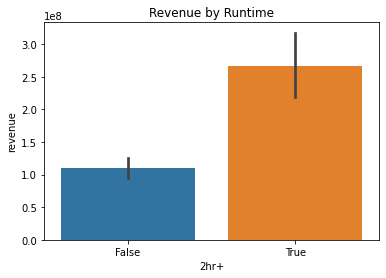

In [56]:
ax = sns.barplot(data=plot_df, x='2hr+', y='revenue')
ax.set_title('Revenue by Runtime');

In [58]:
zscores = stats.zscore(over_df.revenue)
outliers = abs(zscores) > 3
np.sum(outliers)

5

In [59]:
zscores = stats.zscore(under_df.revenue)
outliers = abs(zscores) > 3
np.sum(outliers)

17

In [68]:
over_rev = over_df.revenue
over_rev = over_rev[(np.abs(stats.zscore(over_rev)) < 3)]

In [69]:
under_rev = under_df.revenue
under_rev = under_rev[(np.abs(stats.zscore(under_rev)) < 3)]


In [74]:
over_rev_result = stats.normaltest(over_rev)
over_rev_result

NormaltestResult(statistic=90.39414120888634, pvalue=2.3505074838997782e-20)

In [71]:
under_rev_result = stats.normaltest(under_rev)
under_rev_result

NormaltestResult(statistic=302.63665971737566, pvalue=1.9199252997818017e-66)

In [75]:
over_under_ev = stats.levene(over_rev,under_rev)
over_under_ev

LeveneResult(statistic=89.82587387230386, pvalue=2.500144556409034e-20)

In [76]:
over_under_t = stats.ttest_ind(over_rev,under_rev, equal_var = False)
over_under_t

Ttest_indResult(statistic=6.878881493850175, pvalue=4.212068164819063e-11)

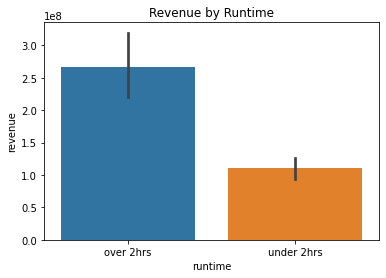

In [97]:
over_df['runtime'] = 'over 2hrs'
under_df['runtime'] = 'under 2hrs'
over_under_df = pd.concat([over_df,under_df])
ax = sns.barplot(data=over_under_df, x= 'runtime', y= 'revenue')
ax.set_title('Revenue by Runtime');

- I will reject my null hypothesis and support the alt hypothesis.
- According to my tests and the p-value resulting in amounts less than .05 it is clear that there is a significant difference in  revenue generated based film runtime
- Films over 2hrs long bring in more revenue


### Does budget impact revenue?
- $H_0$: There is no significant difference in  the revenue based the budget for film creation.
- $H_A$:There is a significant difference in revenue generated based the budget for film creation.

- **The appropriate test to perform would be:**

    - Measuring a numeric quantity (revenue and budget)
    - We therefore want to perform an independent t-test

- **According the the work flow, the T-Test has the following assumptions:** 
    - No significant outliers
    - Normality
    - Equal Variance

In [81]:
combined_years['budget'].mean()

43128485.89497717

In [82]:
combined_years['high_budget'] = combined_years['budget']> 43128485.89497717

In [84]:
high_df = combined_years.loc[combined_years['high_budget']==True, ['revenue', 'high_budget']]
low_df = combined_years.loc[combined_years['high_budget']==False, ['revenue', 'high_budget']]
plot_df2 = pd.concat([high_df, low_df], axis=0)
plot_df2

,revenue,high_budget
1,1.671713e+09,True
4,5.193120e+08,True
10,3.324330e+06,True
46,4.406035e+08,True
48,9.883787e+07,True
...,...,...
20488,4.440000e+07,False
20624,5.750000e+06,False
20626,6.163178e+07,False
20679,9.341824e+06,False


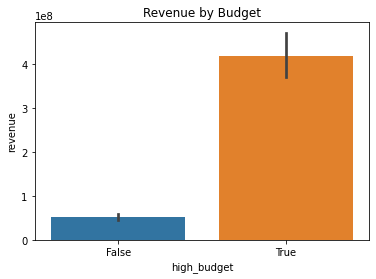

In [85]:
ax = sns.barplot(data=plot_df, x='high_budget', y='revenue')
ax.set_title('Revenue by Budget');

In [86]:
zscores= stats.zscore(high_df.revenue)
outliers = abs(zscores)>3
np.sum(outliers)

4

In [87]:
zscores= stats.zscore(low_df.revenue)
outliers = abs(zscores)>3
np.sum(outliers)

14

In [88]:
high_df_rev = high_df.revenue
high_df_rev = high_df_rev[(np.abs(stats.zscore(high_df_rev)) < 3)]

In [89]:
low_df_rev = low_df.revenue
low_df_rev = low_df_rev[(np.abs(stats.zscore(low_df_rev)) < 3)]

In [90]:
high_df_rev_result = stats.normaltest(high_df_rev)
high_df_rev_result

NormaltestResult(statistic=51.799824530605136, pvalue=5.646912020059903e-12)

In [91]:
low_df_rev_result = stats.normaltest(low_df_rev)
low_df_rev_result

NormaltestResult(statistic=249.9925438764438, pvalue=5.1857173153916145e-55)

In [92]:
high_low_ev = stats.levene(high_df_rev,low_df_rev)
high_low_ev

LeveneResult(statistic=386.67925344645676, pvalue=2.5180585926030627e-71)

In [94]:
high_low_t = stats.ttest_ind(high_df_rev,low_df_rev, equal_var = False)
high_low_t

Ttest_indResult(statistic=15.288275141942298, pvalue=1.7299994008678625e-37)

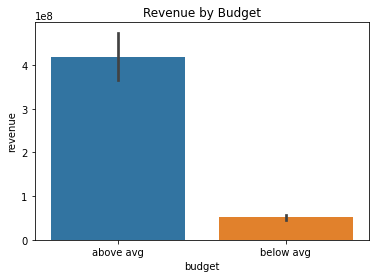

In [96]:
high_df['budget'] = 'above avg'
low_df['budget'] = 'below avg'
high_low_df = pd.concat([high_df,low_df])
ax = sns.barplot(data=high_low_df, x= 'budget', y= 'revenue')
ax.set_title('Revenue by Budget');

- I will reject my null hypothesis and support the alt hypothesis.
- According to my tests and the p-value resulting in amounts less than .05 it is clear that there is a significant difference in  revenue generated based budget spent to create films in question
- Films with larger budgets bring in more revenue